In [382]:
import torch
import torch.nn as nn
from torchvision.transforms import transforms
import torchvision.datasets as datasets
import matplotlib.pylab as plt

In [383]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [390]:
# Resize the image size 
IMAGE_SIZE = 16
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [391]:
train_ds = datasets.FashionMNIST(root='./data', train=True, transform=composed, download=True)
test_ds = datasets.FashionMNIST(root='./data', train=False, transform=composed, download=True)

In [392]:
print(f'Length of Train Dataset: {len(train_ds)}')
print(f'Length of Test Dataset: {len(test_ds)}')

Length of Train Dataset: 60000
Length of Test Dataset: 10000


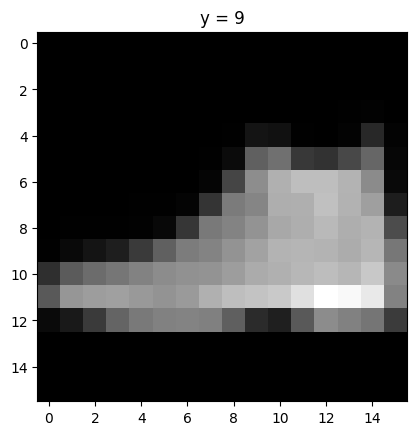

In [393]:
show_data(test_ds[0])

In [394]:
class SoftMax(nn.Module):
    def __init__(self, op_1=16, op_2=32):
        super(SoftMax, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=op_1, kernel_size=5, padding=2)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn1_bn = nn.BatchNorm2d(op_1)
        
        self.cnn2 = nn.Conv2d(in_channels=op_1, out_channels=op_2, kernel_size=5, padding=2, stride=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.cnn2_bn = nn.BatchNorm2d(op_2)
        
        self.linear = nn.Linear(op_2*4*4, 10)
        
    def forward(self, x):

        x = self.cnn1(x)
        x = self.maxpool1(x)
        x = self.cnn1_bn(x)
        
        x = self.cnn2(x)
        x = self.maxpool2(x)
        x = self.cnn2_bn(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)

        
        return x

In [395]:
# Initiate DataLoader

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=100)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=5000)

In [396]:
model = SoftMax(op_1=16, op_2=32)

In [397]:
#Model Parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_tests = len(test_ds)
accuracy_list = []
loss_list = []
epochs = 3

def train_model(epochs):  
    loss = 0
    for epoch in range(epochs):
        for features, labels in train_dl:
            optimizer.zero_grad()
            pred_label = model(features)
            loss = criterion(pred_label, labels)
            loss.backward()
            optimizer.step()
            loss+=loss.data.item()
            #print(loss.data.item(), end=' ')
        loss_list.append(loss.data.item())

        correct = 0
        for feature_test, label_test in test_dl:
            z = model(feature_test)
            _, pred_label_test = torch.max(z.data, 1)
            correct+=(pred_label_test == label_test).sum().item()
        accuracy = correct/n_tests
        print(f'Accuracy: {accuracy*100}%')
        print(f'LOSS: {loss}')
        accuracy_list.append(accuracy)

train_model(epochs)


Accuracy: 86.7%
LOSS: 0.4442046284675598
Accuracy: 88.07000000000001%
LOSS: 0.3932148814201355
Accuracy: 88.53999999999999%
LOSS: 0.36755961179733276


[0.4442046284675598, 0.3932148814201355, 0.36755961179733276]
[0.867, 0.8807, 0.8854]


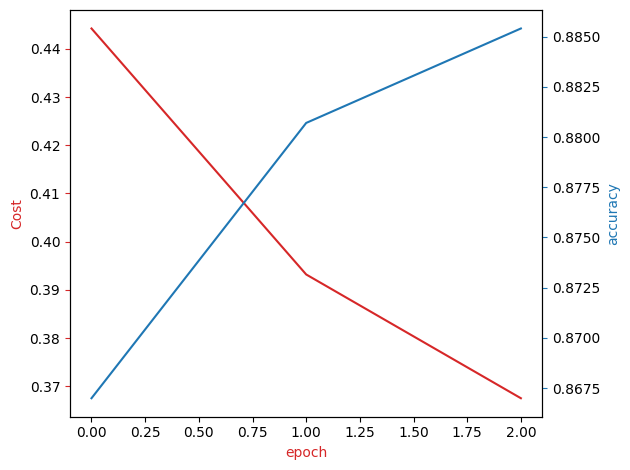

In [398]:

print(loss_list)
print(accuracy_list)   

# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()